### Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 9,9

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [3]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV

### Understanding the Dataset

In [5]:
# Loading the dataset into pandas data frame
df = pd.read_csv("taxi_fare.csv")

In [6]:
# print first 5 colums
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [7]:
# checking the number of rows and columns
df.shape

(212345, 18)

In [8]:
# Check column names
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [9]:
#Identify data types
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [10]:
# Checking the null values in the data frame
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [12]:
# Get summary statistics
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [13]:
# Check unique values (df['col'].unique())

for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 50)

Unique values in column 'tpep_pickup_datetime':
['2016-03-01 00:00:00' '2016-03-01 00:00:01' '2016-03-01 00:00:02' ...
 '2016-03-01 12:15:36' '2016-03-01 12:15:37' '2016-03-01 12:15:38']
--------------------------------------------------
Unique values in column 'tpep_dropoff_datetime':
['2016-03-01 00:07:55' '2016-03-01 00:11:06' '2016-03-01 00:31:06' ...
 '2016-03-01 12:37:29' '2016-03-01 12:38:53' '2016-03-01 12:38:22']
--------------------------------------------------
Unique values in column 'store_and_fwd_flag':
['N' 'Y']
--------------------------------------------------


### Data cleaning

#### Convert str into date time format

In [16]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [17]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [18]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


### Convert Coordinated Universal Time(UTC) into Eastern time zone(EDT)

In [20]:
# Step 1: Localize to UTC (if it's naive / timezone-unaware)
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern (will automatically apply EDT/EST depending on date)
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

In [21]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


#### Create Distance in km Column

In [23]:
# Define the haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0  
    
    # Convert latitude and longitude from degrees to radians
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    # Haversine formula
    a = np.sin(delta_phi / 2.0) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance_km = R * c  # in kilometers
    return np.round(distance_km, 2)  # round to 2 decimal places

In [24]:
df['distance_km'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

In [25]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.14
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.30
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.60
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.05
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.40


### Create pickup_day Column

In [27]:
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [28]:
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

<div align="left">

### 📅 `dayofweek` to Weekday Mapping

| dayofweek | Day       |
|:----------|:----------|
| 0         | Monday    |
| 1         | Tuesday   |
| 2         | Wednesday |
| 3         | Thursday  |
| 4         | Friday    |
| 5         | Saturday  |
| 6         | Sunday    |

</div>

In [30]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.14,Weekday,0
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.30,Weekday,0
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.60,Weekday,0
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.05,Weekday,0
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.40,Weekday,0


#### label encoding for pickup_day column
##### Weekday --> 0
##### Weekend --> 1

In [32]:
df['pickup_day'] = df['pickup_day'].apply(lambda x: 1 if x == 'Weekday' else 0)

In [33]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week
130952,2,2016-03-01 03:10:49-05:00,2016-03-01 08:23:35,1,-74.015793,40.710876,1,N,-74.001770,40.730392,...,10.0,0.0,0.5,2.16,0.0,0.3,12.96,2.47,1,1
29520,2,2016-03-10 04:44:37-05:00,2016-03-10 10:00:03,1,-73.986710,40.756050,1,N,-73.996353,40.725861,...,12.0,0.0,0.5,2.56,0.0,0.3,15.36,3.45,1,3
58281,2,2016-03-10 07:40:13-05:00,2016-03-10 13:00:20,5,-74.000626,40.737389,1,N,-73.987518,40.743038,...,12.5,0.0,0.5,2.66,0.0,0.3,15.96,1.27,1,3
35509,2,2016-03-10 05:20:39-05:00,2016-03-10 10:48:23,1,-73.974907,40.756371,1,N,-73.992088,40.749359,...,16.5,0.0,0.5,3.46,0.0,0.3,20.76,1.64,1,3
21422,2,2016-03-10 03:59:55-05:00,2016-03-10 09:18:53,3,-73.968178,40.799633,1,N,-73.960335,40.770023,...,14.5,0.0,0.5,4.59,0.0,0.3,19.89,3.36,1,3


In [34]:
df['pickup_day'].value_counts()

pickup_day
1    212345
Name: count, dtype: int64

#### something strange in pickup day column because we have only one values. to confirm the we need to check the dates

In [36]:
df['pickup_dates'] = df['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')

In [37]:
df['pickup_dates'].value_counts()

pickup_dates
2016-03-01    112944
2016-03-10     81783
2016-02-29     17618
Name: count, dtype: int64

#### we have only 3 days vaule in our data. Everything is  weekday data. so, this pickup_day column won't be usefull for machine learning. so after extract all details from tpep_pickup_datetime, we can drop this tpep_pickup_datetime column

In [39]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week,pickup_dates
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,0.5,2.05,0.00,0.3,12.35,3.14,1,0,2016-02-29
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,0.5,3.05,0.00,0.3,15.35,4.30,1,0,2016-02-29
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,0.5,8.00,0.00,0.3,63.80,16.60,1,0,2016-02-29
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.0,0.5,3.78,5.54,0.3,41.62,9.05,1,0,2016-02-29
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.0,0.00,15.50,0.3,113.80,20.40,1,0,2016-02-29


### am/pm: Extract am/pm

In [41]:
df['am_pm'] = df['tpep_pickup_datetime'].dt.strftime('%p')

In [42]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week,pickup_dates,am_pm
19462,2,2016-03-10 03:49:41-05:00,2016-03-10 08:59:54,5,-73.982193,40.774220,1,N,-73.959686,40.809582,...,0.5,2.26,0.0,0.3,13.56,4.36,1,3,2016-03-10,AM
168634,2,2016-03-01 04:43:39-05:00,2016-03-01 09:53:34,1,-73.987373,40.752106,1,N,-74.000847,40.747082,...,0.5,1.00,0.0,0.3,9.80,1.27,1,1,2016-03-01,AM
40827,2,2016-03-10 05:53:52-05:00,2016-03-10 11:12:21,1,-73.993790,40.751621,1,N,-73.989357,40.776440,...,0.5,1.50,0.0,0.3,15.80,2.78,1,3,2016-03-10,AM
205730,2,2016-03-01 06:52:49-05:00,2016-03-01 12:02:38,1,-73.959610,40.773998,1,N,-73.970581,40.758911,...,0.5,1.00,0.0,0.3,9.80,1.92,1,1,2016-03-01,AM
165036,2,2016-03-10 09:53:25-05:00,2016-03-10 15:19:58,6,-73.975563,40.757008,1,N,-73.964714,40.806538,...,0.5,3.96,0.0,0.3,23.76,5.58,1,3,2016-03-10,AM


### label encoding for am_pm column
#### AM --> 0
#### PM --> 1

In [44]:
df['am_pm'] = df['am_pm'].apply(lambda x: 0 if x == 'AM' else 1)

In [45]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week,pickup_dates,am_pm
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,2.05,0.00,0.3,12.35,3.14,1,0,2016-02-29,1
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,3.05,0.00,0.3,15.35,4.30,1,0,2016-02-29,1
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,8.00,0.00,0.3,63.80,16.60,1,0,2016-02-29,1
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.5,3.78,5.54,0.3,41.62,9.05,1,0,2016-02-29,1
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.00,15.50,0.3,113.80,20.40,1,0,2016-02-29,1


### Creating hour and is_night column
#### I considering the night time as 10 PM (22:00) to 5 AM (05:00)

In [47]:
# Extract hour from datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Set binary flag: 1 = night, 0 = not night
df['is_night'] = df['hour'].apply(lambda x: 1 if x <= 5 or x >= 22 else 0)

In [48]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week,pickup_dates,am_pm,hour,is_night
207050,2,2016-03-01 06:57:30-05:00,2016-03-01 12:14:22,1,-73.959595,40.777233,1,N,-73.963394,40.808594,...,0.0,0.3,17.16,3.50,1,1,2016-03-01,0,6,0
61509,2,2016-03-10 07:57:47-05:00,2016-03-10 13:28:16,1,-74.007523,40.725990,1,N,-73.983414,40.766201,...,0.0,0.3,23.76,4.91,1,3,2016-03-10,0,7,0
111425,2,2016-03-01 02:12:16-05:00,2016-03-01 07:17:45,1,-73.985687,40.723030,1,N,-73.990517,40.730598,...,0.0,0.3,6.30,0.93,1,1,2016-03-01,0,2,1
22325,2,2016-03-10 04:04:38-05:00,2016-03-10 09:07:02,1,-73.987633,40.754631,1,N,-73.993652,40.755211,...,0.0,0.3,4.80,0.51,1,3,2016-03-10,0,4,1
98407,2,2016-03-10 09:20:21-05:00,2016-03-10 14:39:57,1,-73.989243,40.768246,1,N,-74.008224,40.722713,...,0.0,0.3,22.49,5.31,1,3,2016-03-10,0,9,0


### Drop unnecessary columns

In [50]:
# drop longitude and latitude columns
df.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)

In [51]:
# drop tpep_dropoff_datetime column
df.drop(['tpep_dropoff_datetime'], axis=1, inplace=True)

In [52]:
# drop VendorID column
df.drop(['VendorID'], axis=1, inplace=True)

In [53]:
# drop store_and_fwd_flag column
df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

In [54]:
# drop RatecodeID column
df.drop(['RatecodeID'], axis=1, inplace=True)

In [55]:
# drop unnecessary payment releated columns
df.drop(['payment_type', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge'], axis=1, inplace=True)

In [56]:
# drop unnecessary datetime releated columns
df.drop(['pickup_dates', 'pickup_day', 'tpep_pickup_datetime'], axis=1, inplace=True)

In [57]:
df.sample(10)

,passenger_count,tip_amount,total_amount,distance_km,day_of_week,am_pm,hour,is_night
195852,1,1.00,10.30,2.04,1,0,6,0
94389,1,2.56,15.36,1.74,3,0,8,0
6272,2,0.00,7.30,1.58,3,0,2,1
28507,1,2.86,17.16,3.88,3,0,4,1
204913,1,0.00,6.80,0.57,1,0,6,0
138676,1,2.25,13.55,1.70,1,0,3,1
39925,1,5.00,38.34,8.45,3,0,5,1
146786,1,0.00,8.30,0.77,1,0,3,1
10874,1,2.16,12.96,2.06,3,0,3,1
35245,1,1.00,7.80,0.73,3,0,5,1


### Correlation
#### 1. Positive correlation
#### 2. Negative correlation

In [59]:
correlation = df.corr()

In [60]:
print(correlation)

                 passenger_count  tip_amount  total_amount  distance_km  \
passenger_count         1.000000    0.002656      0.005430    -0.014362   
tip_amount              0.002656    1.000000      0.718677     0.006264   
total_amount            0.005430    0.718677      1.000000     0.025692   
distance_km            -0.014362    0.006264      0.025692     1.000000   
day_of_week             0.137266    0.026183      0.017341    -0.022978   
am_pm                  -0.029322   -0.006633      0.037271     0.009147   
hour                    0.001751    0.000498      0.054131     0.004777   
is_night               -0.037845   -0.008613     -0.044460     0.004889   

                 day_of_week     am_pm      hour  is_night  
passenger_count     0.137266 -0.029322  0.001751 -0.037845  
tip_amount          0.026183 -0.006633  0.000498 -0.008613  
total_amount        0.017341  0.037271  0.054131 -0.044460  
distance_km        -0.022978  0.009147  0.004777  0.004889  
day_of_week        

#### Constructing the Heatmap to understand the correlation

<Axes: >

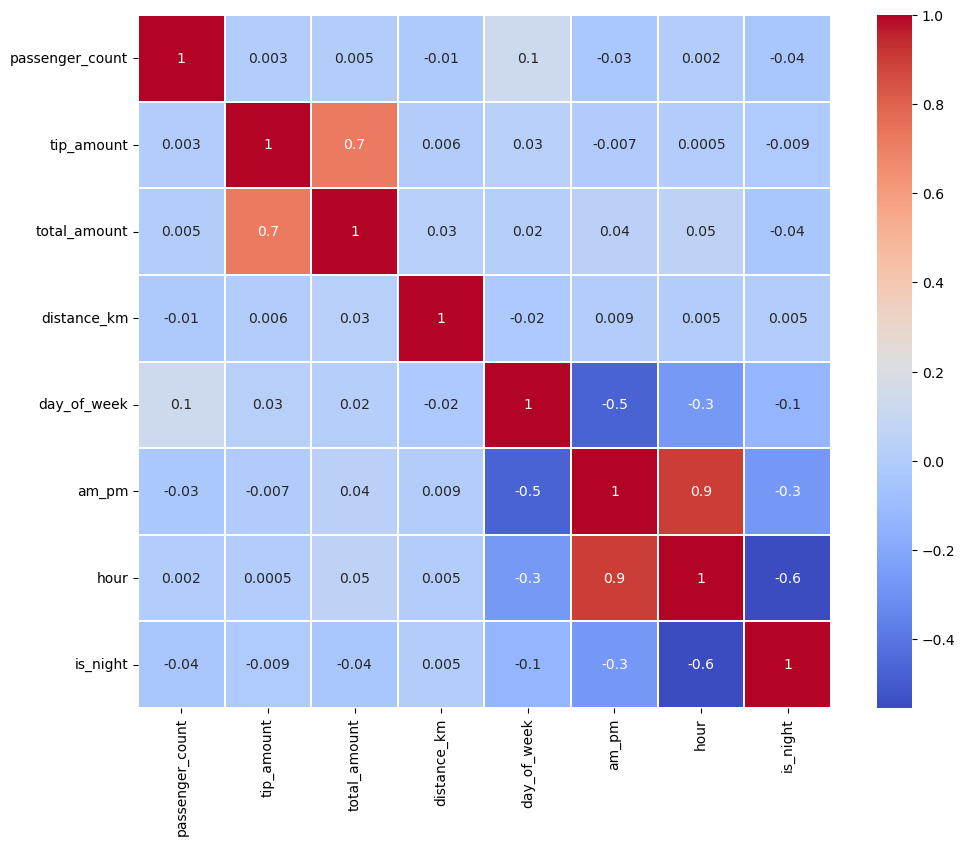

In [62]:
plt.figure(figsize = (12,9))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size":10}, fmt=".1g", cmap="coolwarm", 
            linewidths=0.1, linecolor='white')

### Skewness

In [64]:
skewness = df.skew()
skewness

passenger_count     1.886940
tip_amount          7.663467
total_amount        5.271134
distance_km        19.776430
day_of_week         0.242824
am_pm               3.023795
hour                2.121815
is_night           -0.603459
dtype: float64

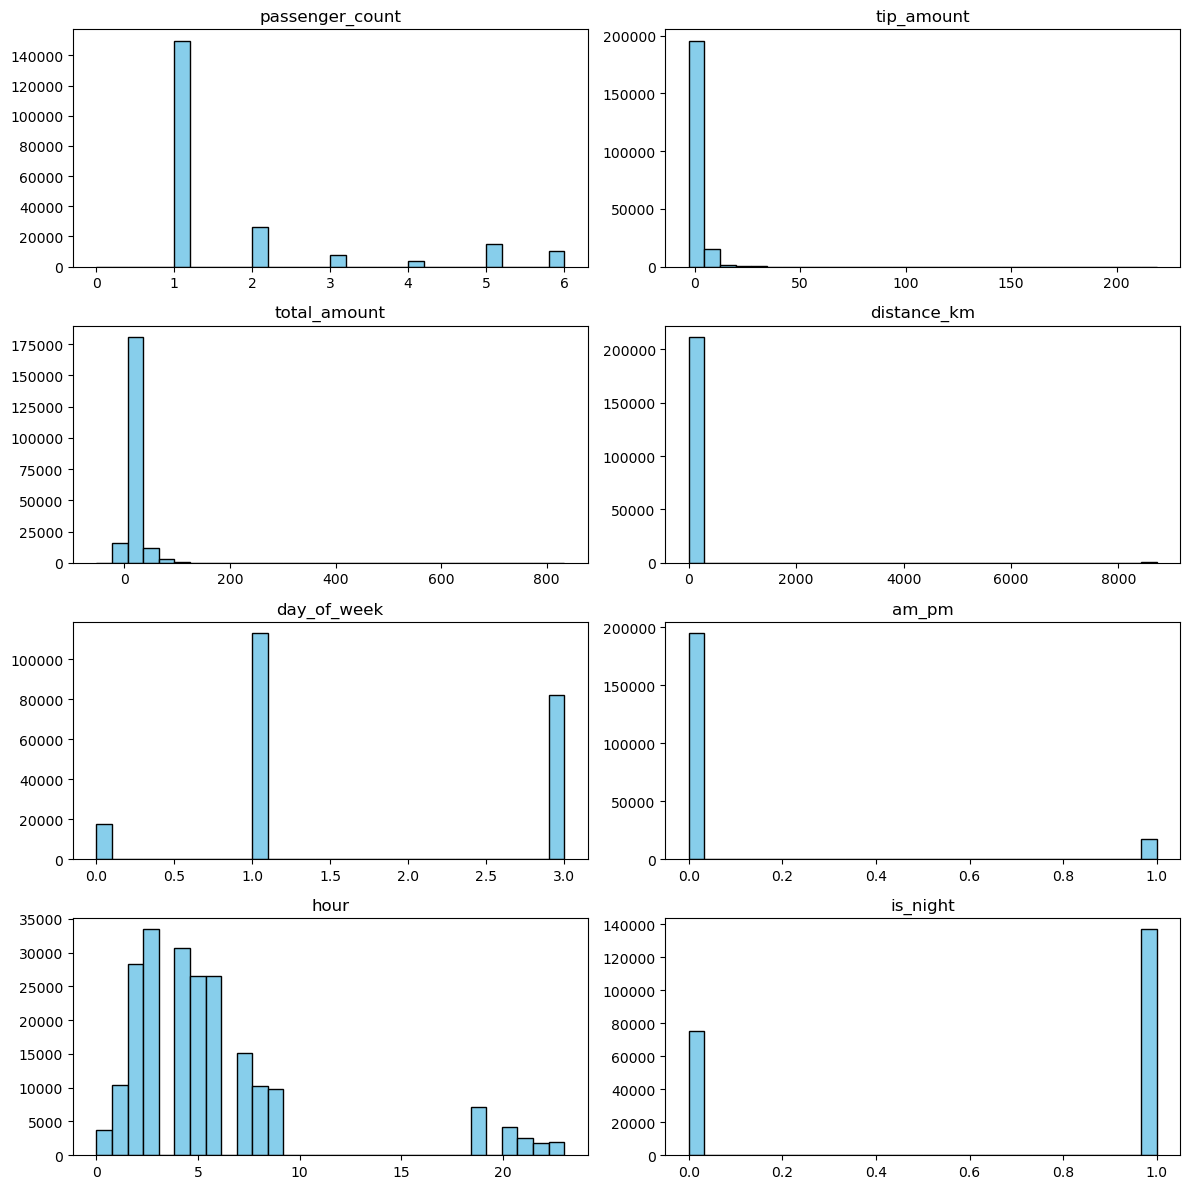

In [65]:
# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness.index

# Plot histograms before transformation
plt.figure(figsize=(12,12))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(4,2,i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

# Outliers Treatment

In [67]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['passenger_count', 'tip_amount', 'total_amount', 'distance_km',
       'day_of_week', 'am_pm', 'hour', 'is_night'],
      dtype='object')

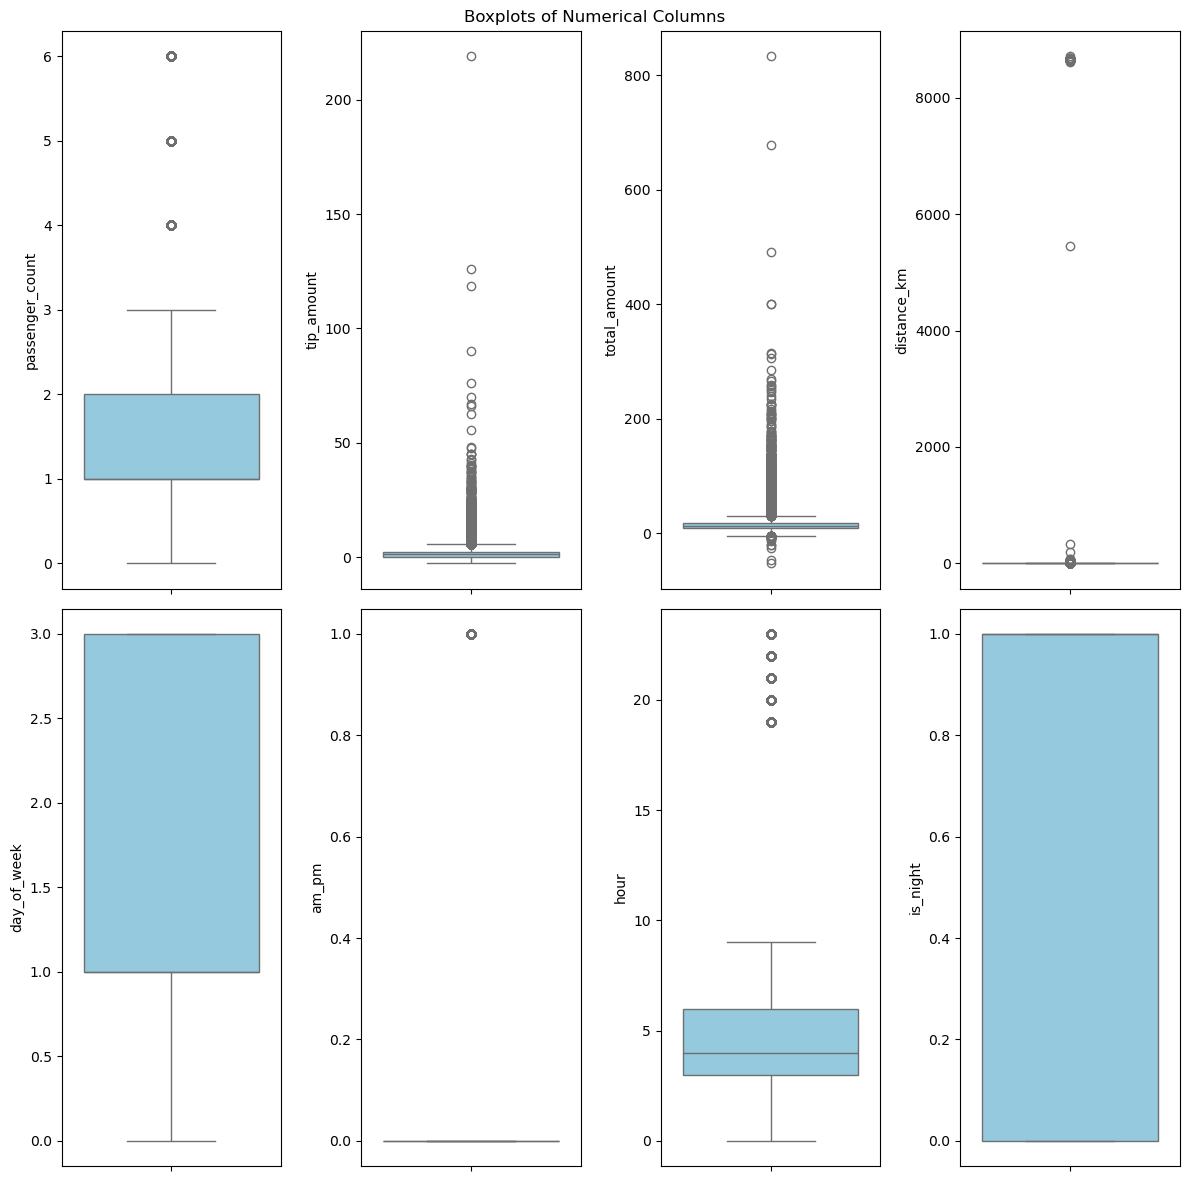

In [68]:
# Loop through numerical columns and create boxplots

plt.figure(figsize=(12, 12))
plt.suptitle('Boxplots of Numerical Columns')
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='skyblue',)
    plt.tight_layout()

### distance_km

In [70]:
df[df['distance_km']>50]

,passenger_count,tip_amount,total_amount,distance_km,day_of_week,am_pm,hour,is_night
6,6,0.00,24.30,8666.43,0,1,19,0
434,6,0.00,3.30,8665.95,3,0,2,1
1337,1,10.00,68.34,8664.81,3,0,2,1
1457,5,0.00,3.30,8659.52,3,0,2,1
5196,6,0.00,0.00,8659.51,3,0,2,1
...,...,...,...,...,...,...,...,...
211574,1,2.45,12.25,8662.88,1,0,7,0
211663,1,0.00,3.30,8665.70,1,0,7,0
211810,1,0.00,7.30,8664.42,1,0,7,0
211927,1,4.95,24.75,8665.72,1,0,7,0


### we have 549 columns more than 50 km distance. it is outliers so we need to remove those values

#### Before Removing Outliers

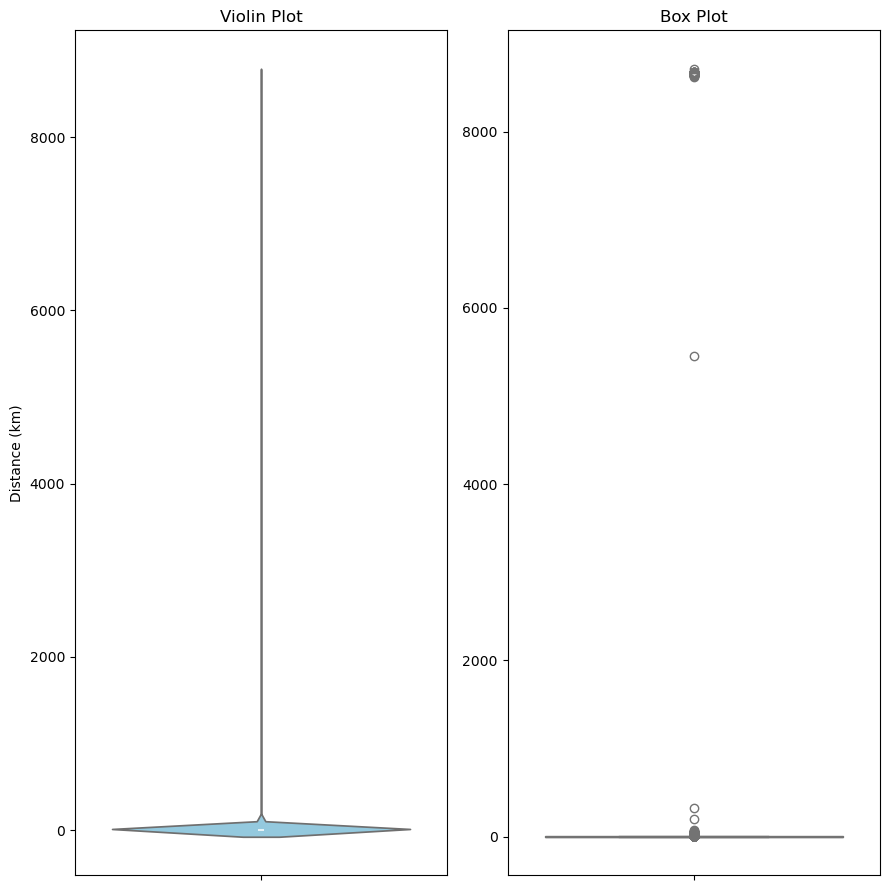

In [73]:
plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
sns.violinplot(y=df['distance_km'], color='skyblue')
plt.title('Violin Plot')
plt.ylabel('Distance (km)')

# Box plot on the right
plt.subplot(1, 2, 2)
sns.boxplot(y=df['distance_km'], color='lightgreen')
plt.title('Box Plot')
plt.ylabel('')  # Hide repeated label

plt.tight_layout()
plt.show()

### to remove outliers

In [75]:
Q1 = df['distance_km'].quantile(0.25)  # 25th percentile
Q3 = df['distance_km'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values at lower and upper bound
df['distance_km'] = np.where(df['distance_km'] < lower_bound, lower_bound, df['distance_km'])
df['distance_km'] = np.where(df['distance_km'] > upper_bound, upper_bound, df['distance_km'])

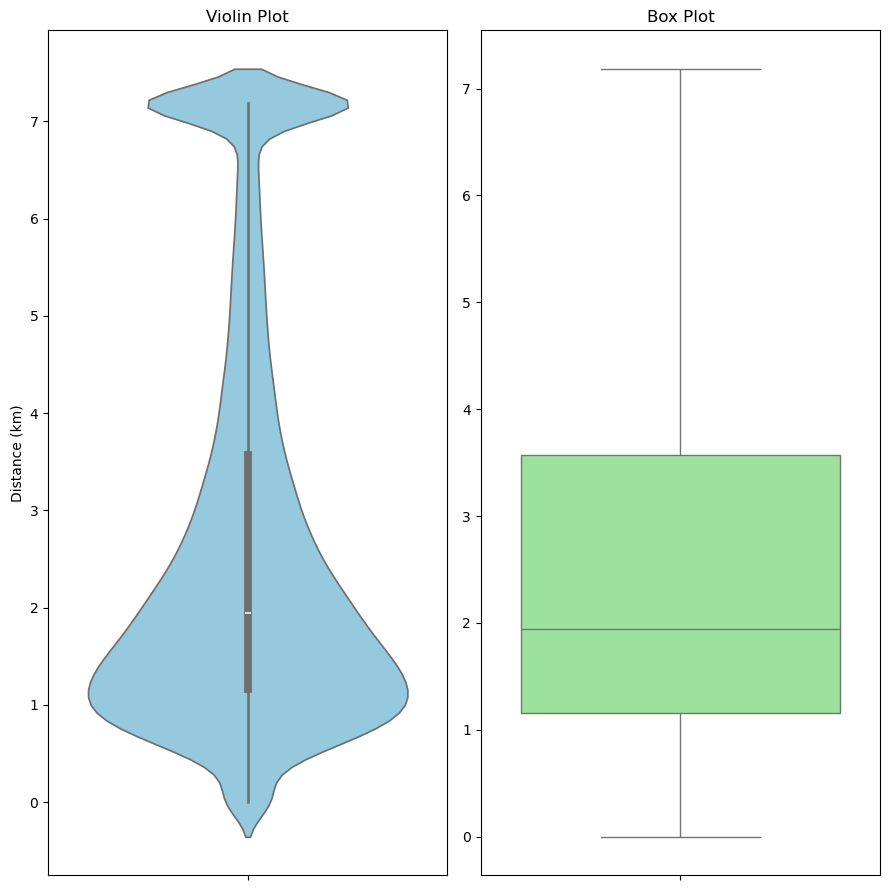

In [76]:
plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
sns.violinplot(y=df['distance_km'], color='skyblue')
plt.title('Violin Plot')
plt.ylabel('Distance (km)')

# Box plot on the right
plt.subplot(1, 2, 2)
sns.boxplot(y=df['distance_km'], color='lightgreen')
plt.title('Box Plot')
plt.ylabel('')  # Hide repeated label

plt.tight_layout()
plt.show()

### passenger_count

#### Drop Zero passenger_count columns because this is anomaly value

In [79]:
df['passenger_count'].value_counts()

passenger_count
1    149838
2     26371
5     14904
6     10328
3      7542
4      3353
0         9
Name: count, dtype: int64

In [80]:
df.drop(df[df['passenger_count'] < 1].index, inplace=True)

In [81]:
df['passenger_count'].value_counts()

passenger_count
1    149838
2     26371
5     14904
6     10328
3      7542
4      3353
Name: count, dtype: int64

### tip_amount, total_amount

In [83]:
# tip_amount won't be less than zero. So, we need to remove the anomaly values
df[df['tip_amount']<0]

,passenger_count,tip_amount,total_amount,distance_km,day_of_week,am_pm,hour,is_night
2231,1,-2.34,-10.14,1.36,3,0,2,1
7141,5,-0.66,-3.96,0.00,3,0,2,1
7495,5,-0.66,-3.96,0.08,3,0,2,1
60435,1,-2.70,-6.00,0.00,3,0,7,0


In [84]:
# total_amount won't be less than zero. So,  we need to remove the anomaly values
df[df['total_amount']<=0]

,passenger_count,tip_amount,total_amount,distance_km,day_of_week,am_pm,hour,is_night
354,5,0.00,0.00,0.010,3,0,2,1
407,1,0.00,-6.30,0.740,3,0,2,1
1119,1,0.00,-3.30,7.185,3,0,2,1
1309,1,0.00,0.00,0.000,3,0,2,1
2231,1,-2.34,-10.14,1.360,3,0,2,1
...,...,...,...,...,...,...,...,...
203293,2,0.00,-3.30,0.020,1,0,6,0
204041,1,0.00,-3.80,0.110,1,0,6,0
208970,1,0.00,-6.30,0.540,1,0,7,0
209202,1,0.00,-5.30,0.580,1,0,7,0


In [85]:
# Drop tip_amonut and total_amount is less than 0. So,  we are going to drop the anomaly values
df.drop(df[df['tip_amount'] < 0].index, inplace=True)
df.drop(df[df['total_amount'] <= 0].index, inplace=True)

In [86]:
# Now we need to remove the outliers from tip_amount and total_amount column
amount_columns = ['tip_amount','total_amount']

for col in amount_columns:

    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

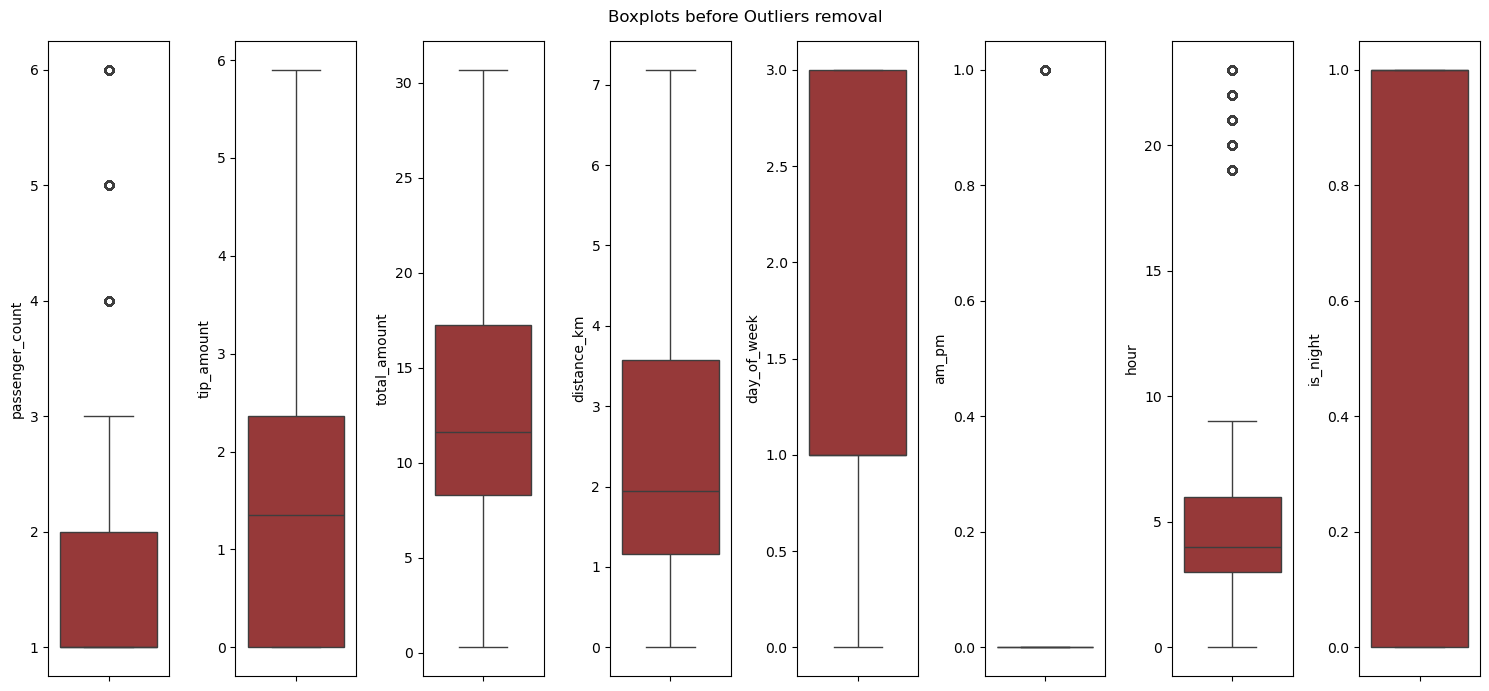

In [87]:
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='brown',)
    plt.tight_layout()

### AM_PM

In [89]:
df['am_pm'].value_counts()

am_pm
0    194596
1     17597
Name: count, dtype: int64

### Hour

In [91]:
df['hour'].value_counts()

hour
3     33424
4     30649
2     28268
5     26590
6     26478
7     15102
1     10342
8     10194
9      9855
19     7074
20     4143
0      3694
21     2597
23     1925
22     1858
Name: count, dtype: int64

In [92]:
df['distance_km'] = np.log1p(df['distance_km'])

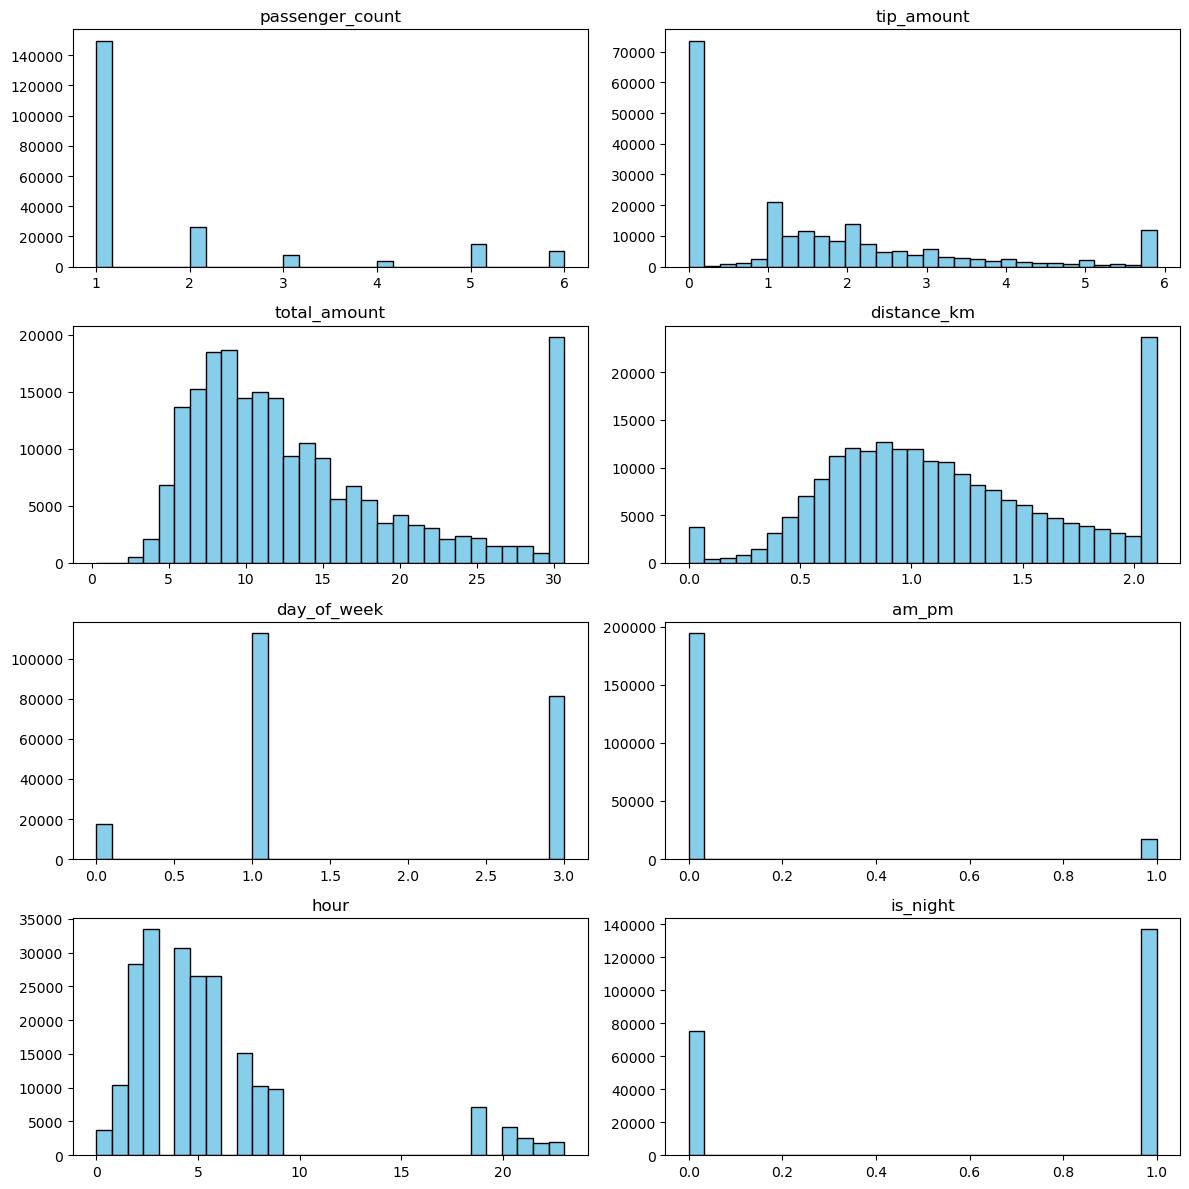

In [93]:
skewness = df.skew()

# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness.index

# Plot histograms before transformation
plt.figure(figsize=(12,12))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(4,2,i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [94]:
df.columns

Index(['passenger_count', 'tip_amount', 'total_amount', 'distance_km',
       'day_of_week', 'am_pm', 'hour', 'is_night'],
      dtype='object')

In [95]:
# For reset index
df = df.reset_index(drop=True)

In [96]:
df.to_csv('data_cleaned.csv',index=False)

In [97]:
data = pd.read_csv('data_cleaned.csv')

In [98]:
X = data.drop('total_amount',axis=1)
y = data['total_amount']

### Training data 70% and Test data 30%

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [101]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,2.247820,11.584443,3.403593,0.793508
Decision Tree Regressor,1.374983,7.352077,2.711471,0.868949
Random Forest Regressor,1.227517,5.501487,2.345525,0.901936
XGBoost Regressor,1.266373,4.945897,2.223937,0.911840


### Training data 75% and Test data 25%

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [104]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,2.245462,11.603092,3.406331,0.792814
Decision Tree Regressor,1.366543,7.201600,2.683580,0.871407
Random Forest Regressor,1.223435,5.456462,2.335907,0.902569
XGBoost Regressor,1.265317,4.912432,2.216401,0.912283


### Training data 80% and Test data 20%

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,2.239816,11.440936,3.382445,0.795616
Decision Tree Regressor,1.342134,7.071754,2.659277,0.873668
Random Forest Regressor,1.204074,5.331836,2.309077,0.904750
XGBoost Regressor,1.257421,4.814489,2.194194,0.913993


### Hyperparameter Tuning (using RandomizedSearchCV)

In [109]:
# Define the model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   scoring='r2',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Best estimator
best_xgb = random_search.best_estimator_
print("Best Hyperparameters:\n", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:
 {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


### Cross-Validation (Using the Best Model)

In [111]:
# Cross-validate R² score
cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_scores)
print("Average R2 Score:", np.mean(cv_scores))

Cross-Validated R2 Scores: [0.91858075 0.8985673  0.90390768 0.90441384 0.90137432]
Average R2 Score: 0.9053687788597486


### Feature Importance Visualization

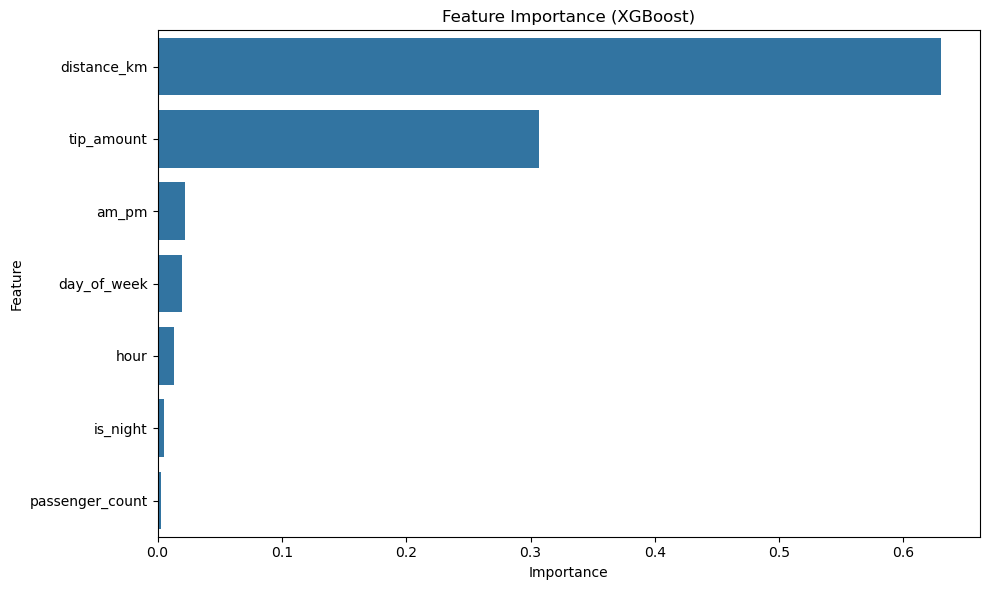

In [113]:
# Fit best model
best_xgb.fit(X_train, y_train)

# Get feature importance
importances = best_xgb.feature_importances_
features = X.columns

# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

### Predicting system

In [203]:
my_df = {
    "passenger_count": [int(input())],
    "tip_amount": [float(input())],
    "distance_km": [float(input())],
    "day_of_week": [int(input())],
    "am_pm": [int(input())],
    "hour": [int(input())],
    "is_night": [int(input())]
}

input_data = pd.DataFrame(my_df)

 1
 1
 0.73
 3
 0
 5
 1


In [205]:
input_data['distance_km'] = np.log1p(input_data['distance_km'])

In [207]:
input_data

,passenger_count,tip_amount,distance_km,day_of_week,am_pm,hour,is_night
0,1,1.0,0.548121,3,0,5,1


In [209]:
pred = best_xgb.predict(input_data)
pred[0]

7.393325